<a href="https://colab.research.google.com/github/manthan038/Machine-Learning-/blob/master/NLP_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
#installing contractions
!pip install contractions

     |████████████████████████████████| 327kB 4.8MB/s 
     |████████████████████████████████| 266kB 7.1MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.1-cp37-cp37m-linux_x86_64.whl size=85250 sha256=dac88fd40a8687335ce1a71f628366325822ee908aec8d251eed2d74ca3f34c8
  Stored in directory: /root/.cache/pip/wheels/e4/ab/f7/cb39270df8f6126f3dd4c33d302357167086db460968cfc80c
Successfully built pyahocorasick


In [64]:
import pandas as pd
import nltk 
import numpy  as np
import matplotlib as plt 
import contractions
import re
import spacy
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


### Load Train data "The Taj Hotel"

In [65]:
TrainData = pd.read_csv("/content/TheTajHotel_Train.csv")
TrainData.head(5) # view the top 5 rows of data

,ID,Silver,Status,Trusted Reviews,Last Reviewed On,Violation,Place,Review,Sentiment_Target
0,679455653,False,finalized,3,2/21/2015 0:36,1.0\r0.6667\r0.6667,Jaipur,"I'm not a huge Tea Post lover, but I've been t...",Negative
1,679455654,False,finalized,3,2/21/2015 0:27,1,Jaipur,Terrible customer service. ÃŽÂ¾I came in at 9:...,Negative
2,679455655,False,finalized,3,2/21/2015 0:26,1.0\r1.0,Jaipur,"First they ""lost"" my order, actually they gave...",Neutral
3,679455656,False,finalized,3,2/21/2015 0:27,0.6667,Jaipur,I see I'm not the only one giving 1 star. Only...,Negative
4,679455657,False,finalized,3,2/21/2015 0:27,1,Jaipur,"Well, it's Tea Post's, so you know what the fo...",Negative


In [66]:
#Number of rows
print("Number of row {}".format(TrainData.shape[0]))

#Number of columns
print("Number of Columns {}".format(TrainData.shape[1]))

Number of row 1010
Number of Columns 9


### Load Test data

In [67]:
TestData = pd.read_csv("/content/TheTajHotel_Test.csv")
TestData.head(5) # view the top 5 rows of data

,ID,Silver,Status,Trusted Reviews,Last Reviewed On,Violation,Place,Review,Target_Class
0,679456683,False,finalized,3,2/21/2015 0:54,0.7297,Pune,I have not had the same bad luck as other Yelp...,Positive
1,679456684,False,finalized,3,2/21/2015 0:30,0.6852\r0.6667,Pune,Check your order before you drive off. Always ...,Negative
2,679456685,False,finalized,3,2/21/2015 0:22,0.6902\r0.6584,Pune,"After reading the other reviews, I realized my...",Neutral
3,679456686,False,finalized,3,2/21/2015 0:15,1.0\r0.6891,Pune,"I don't like this place at all, It is always d...",Negative
4,679456687,False,finalized,3,2/21/2015 0:36,1,Pune,I love Tea PostI had 5 ice cream cones once. N...,Positive


In [68]:
#Number of rows
print("Number of row {}".format(TestData.shape[0]))

#Number of columns
print("Number of Columns {}".format(TestData.shape[1]))

Number of row 515
Number of Columns 9


In [69]:
TrainData["Review"][0]
TestData["Review"][0]

'I have not had the same bad luck as other Yelpers here. ÃŽÂ¾The drive thru is quick and the people kids working the windows always specifically say "We appreciate your business." Doesn\'t feel as smug as a Chikfila worker when they say it.They offer two order lines in the drive thru and additional waiting areas for people with large orders. Keeps the traffic moving.Pretty easy to get in and out, and an efficient drive thru is about all you can ask from a Tea Post\'s.'

In [70]:
# check for the null value
TrainData[pd.isnull(TrainData["Review"])]

,ID,Silver,Status,Trusted Reviews,Last Reviewed On,Violation,Place,Review,Sentiment_Target


### convert all review text in lower case

In [71]:
TrainData["Review"] = TrainData["Review"].str.lower()
TestData["Review"] = TestData["Review"].str.lower()
#check the data
TrainData["Review"][1]

'terrible customer service. ãžâ¾i came in at 9:30pm and stood in front of the register and no one bothered to say anything or help me for 5 minutes. ãžâ¾there was no one else waiting for their food inside either, just outside at the window. ãžâ¾ i left and went to chickfila next door and was greeted before i was all the way inside. this tea post is also dirty, the floor was covered with dropped food. obviously filled with surly and unhappy workers.'

### Contraction in train and test data

In [72]:
for index_label, row_series in TrainData.iterrows():
  TrainData.at[index_label, "Review"] = contractions.fix(row_series["Review"])
for index_label, row_series in TestData.iterrows():
  TestData.at[index_label, "Review"] = contractions.fix(row_series["Review"])

#check data after removing contraction
TrainData["Review"][1]

'terrible customer service. ãžâ¾i came in at 9:30pm and stood in front of the register and no one bothered to say anything or help me for 5 minutes. ãžâ¾there was no one else waiting for their food inside either, just outside at the window. ãžâ¾ i left and went to chickfila next door and was greeted before i was all the way inside. this tea post is also dirty, the floor was covered with dropped food. obviously filled with surly and unhappy workers.'

### remove all numeric values

In [73]:
for index_label, row_series in TrainData.iterrows():
  TrainData.at[index_label, "Review"] = re.sub(r'\d+', '', row_series["Review"])
for index_label, row_series in TestData.iterrows():
  TestData.at[index_label, "Review"] = re.sub(r'\d+', '', row_series["Review"])

#check the data after removing numeric values
TrainData["Review"][1]

'terrible customer service. ãžâ¾i came in at :pm and stood in front of the register and no one bothered to say anything or help me for  minutes. ãžâ¾there was no one else waiting for their food inside either, just outside at the window. ãžâ¾ i left and went to chickfila next door and was greeted before i was all the way inside. this tea post is also dirty, the floor was covered with dropped food. obviously filled with surly and unhappy workers.'

### Remove the special charecters and punctuations

In [74]:
for index_label, row_series in TrainData.iterrows():
  TrainData.at[index_label, "Review"] = re.sub(r'[^A-Za-z0-9 ]+', '', row_series["Review"])
for index_label, row_series in TestData.iterrows():
  TestData.at[index_label, "Review"] = re.sub(r'[^A-Za-z0-9 ]+', '', row_series["Review"])

#check the data after removing charecters and punctuations
TrainData["Review"][1]

'terrible customer service i came in at pm and stood in front of the register and no one bothered to say anything or help me for  minutes there was no one else waiting for their food inside either just outside at the window  i left and went to chickfila next door and was greeted before i was all the way inside this tea post is also dirty the floor was covered with dropped food obviously filled with surly and unhappy workers'

### Remove all the stops word 

In [75]:
#Get the stop words 
stop_words = set(stopwords.words("english"))


for index_label, row_series in TrainData.iterrows():
  TrainDataToken = word_tokenize(row_series["Review"])
  TrainDataNoStopWords = [word for word in TrainDataToken if word not in stop_words]
  TrainData.at[index_label, "Review"] = TrainDataNoStopWords

for index_label, row_series in TestData.iterrows():
  TestDataToken = word_tokenize(row_series["Review"])
  TestDataNoStopWords = [word for word in TestDataToken if word not in stop_words]
  TestData.at[index_label, "Review"] = TestDataNoStopWords

In [76]:
# check the review row of data
TrainData["Review"].head()

0    [I, huge, tea, post, lover, I, better, ones, f...
1    [terrible, customer, service, came, pm, stood,...
2    [first, lost, order, actually, gave, someone, ...
3         [see, I, one, giving, star, star, need, say]
4    [well, tea, posts, know, food, review, reflect...
Name: Review, dtype: object

### Now Lemmitization

In [77]:
lemmatizer = WordNetLemmatizer()

for index_label, row_number in TrainData.iterrows():
  lemmatized_words = [lemmatizer.lemmatize(word = x) for x in row_number["Review"]]
  TrainData.at[index_label, "Review"] = lemmatized_words

for index_label, row_number in TestData.iterrows():
  lemmatized_words = [lemmatizer.lemmatize(word = x) for x in row_number["Review"]]
  TestData.at[index_label, "Review"] = lemmatized_words

In [78]:
# Check the target column
TrainData["Review"].head()

0    [I, huge, tea, post, lover, I, better, one, fa...
1    [terrible, customer, service, came, pm, stood,...
2    [first, lost, order, actually, gave, someone, ...
3         [see, I, one, giving, star, star, need, say]
4    [well, tea, post, know, food, review, reflects...
Name: Review, dtype: object

### Noun tagging

In [79]:
TrainData["Review_1"] = TrainData["Review"]
TestData["Review_1"] = TestData["Review"]

is_noun = lambda pos: pos[:2] == 'NN'

for index_label, row_series in TrainData.iterrows():
  nouns = [word for (word, pos) in nltk.pos_tag(row_series["Review_1"]) if is_noun(pos)]
  TrainData.at[index_label, "Review_1"] = nouns
for index_label, row_series in TrainData.iterrows():
  TrainData.at[index_label, "Review_1"] = " ".join(row_series["Review_1"])
for index_label, row_series in TestData.iterrows():
  TestData.at[index_label, "Review_1"] = " ".join(row_series["Review_1"])

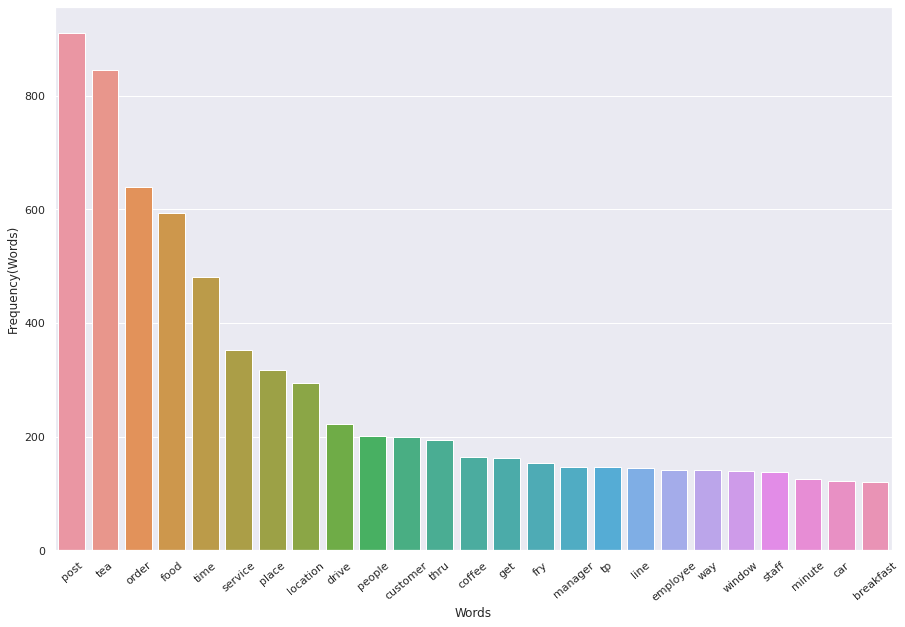

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt
cv = CountVectorizer(max_df=0.9, stop_words=stop_words, max_features=1000, ngram_range=(1,3))

def get_top_n_words(review, n=None):
  vec = CountVectorizer().fit(review)
  bag_of_words = vec.transform(review)
  sum_words = bag_of_words.sum(axis=0)
  words_frequency = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
  words_frequency = sorted(words_frequency, key = lambda x: x[1], reverse=True)
  return words_frequency[:n]

top_words = get_top_n_words(TrainData["Review_1"], n=25)
top_df = pd.DataFrame(top_words)
top_df.columns = ["Words", "Frequency(Words)"]

sns.set(rc={'figure.figsize':(15,10)})
g = sns.barplot(x="Words", y="Frequency(Words)", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=40)
plt.show()

In [87]:
cv = CountVectorizer(max_df=0.9, stop_words=stop_words, max_features=10000, ngram_range=(1,3))
X_train = cv.fit_transform(TrainData["Review_1"])

cv = CountVectorizer(max_df=0.9, stop_words=stop_words, max_features=10000, ngram_range=(1,3))
X_test = cv.fit_transform(TestData["Review_1"])

In [88]:
TrainData["label"] = TrainData["Sentiment_Target"].map({'Positive':1, 'Negative':-1, 'Neutral':0})
TestData["label"] = TestData["Target_Class"].map({'Positive':1, 'Negative':-1, 'Neutral':0})
y_train = TrainData["label"]
y_test = TestData["label"]

### Using Logestic Regression

In [90]:
for c in [0.001,0.01, 0.05, 0.25,0.3, 0.5]:
  lr = LogisticRegression(C=c)
  lr.fit(X_train, y_train)
  print("Accuracy for C = {}: {}".format(c, accuracy_score(y_test, lr.predict(X_test))))

Accuracy for C = 0.001: 0.6310679611650486
Accuracy for C = 0.01: 0.6310679611650486
Accuracy for C = 0.05: 0.596116504854369
Accuracy for C = 0.25: 0.537864077669903
Accuracy for C = 0.3: 0.5262135922330097
Accuracy for C = 0.5: 0.512621359223301


### Using Naive Bayes Classifier

In [91]:
clf = MultinomialNB()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.58      0.08      0.14       325
           0       0.15      0.48      0.22        75
           1       0.23      0.46      0.31       115

    accuracy                           0.22       515
   macro avg       0.32      0.34      0.22       515
weighted avg       0.44      0.22      0.19       515



In [93]:
# Accuracy score using Legestic Regression at c=0.01 
final_model = LogisticRegression(C=0.01)
final_model.fit(X_train, y_train)
print("Final Accuracy: {} %".format(accuracy_score(y_test, final_model.predict(X_test))*100))

Final Accuracy: 63.10679611650486 %
